In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cmocean as ccm

import matplotlib.style as style
style.use('tableau-colorblind10')

In [2]:

CB_colors = {
	'blue':	'#377eb8',
	'orange':  '#ff7f00',
	'green':   '#4daf4a',
	'pink':	'#f781bf',
	'brown':   '#a65628',
	'purple':  '#984ea3',
	'gray':	'#999999',
	'red': 	'#e41a1c',
	'yellow':  '#dede00'
}


In [3]:
# from dask.distributed import Client
import multiprocessing.popen_spawn_posix
from distributed import Client

c = Client()
# c = Client(n_workers=6, threads_per_worker=1, memory_limit="8 GiB",local_directory="/gpfsscratch/rech/cli/uor98hu/dask_tmp/")
c

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46803 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:40331' processes=5 threads=10, memory=20.97 GB>

# Save data in work

In [4]:
chunk_size = {"x":349,"y":500} 

dirisc= "/gpfsscratch/rech/cli/uor98hu/Calcul_psi/"
GAI_psi  = xr.open_mfdataset(dirisc+"GAI/"+"*.nc" ,chunks=chunk_size, parallel = True).sobarstf
AI_psi  = xr.open_mfdataset(dirisc+"AI/"+"*.nc" ,chunks=chunk_size, parallel = True).sobarstf
S_psi  = xr.open_mfdataset(dirisc+"S/"+"*.nc" ,chunks=chunk_size, parallel = True).sobarstf

diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/"

In [5]:
# convert to annual data
psi_GAI = GAI_psi.groupby('time_counter.year').mean('time_counter').chunk(chunks={"x":500,"y":500, "year":20})
psi_AI  = AI_psi.groupby('time_counter.year').mean('time_counter').chunk(chunks={"x":500,"y":500, "year":20})
psi_S   = S_psi.groupby('time_counter.year').mean('time_counter').chunk(chunks={"x":500,"y":500, "year":20})

In [6]:
GAI_psimean = psi_GAI.mean('year')
GAI_psistd = psi_GAI.std('year')

AI_psimean = psi_AI.mean('year')
AI_psistd = psi_AI.std('year')

S_psimean = psi_S.mean('year')
S_psistd = psi_S.std('year')

In [8]:
dsGAI = xr.Dataset(
    data_vars=dict(mean=(["y", "x"], GAI_psimean.data),
                    std=(["y", "x"], GAI_psistd.data)),
    
    attrs=dict(
        description="mean and std over the period 1980-2018 from annual psi",
        units="m3/s"))

dsGAI.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y1980_2018.1y_statsGAIpsi.nc', mode='w')

In [9]:
dsAI = xr.Dataset(
    data_vars=dict(mean=(["y", "x"], AI_psimean.data),
                    std=(["y", "x"], AI_psistd.data)),
    attrs=dict(
        description="mean and std over the period 1980-2018 from annual psi",
        units="m3/s"))

dsAI.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y1980_2018.1y_statsAIpsi.nc', mode='w')

In [10]:
dsS = xr.Dataset(
    data_vars=dict(mean=(["y", "x"], S_psimean.data),
                    std=(["y", "x"], S_psistd.data)),
    attrs=dict(
        description="mean and std over the period 1980-2018 from annual psi",
        units="m3/s"))

dsS.to_netcdf('/gpfswork/rech/cli/uor98hu/MYDATA/psi/eORCA025.L75-IMHOTEP._y1980_2018.1y_statsSpsi.nc', mode='w')

# load data

In [4]:
diriww = '/gpfswork/rech/cli/uor98hu/MYDATA/psi/'
chunk_size = {"x":200,"y":320} 
dsGAI = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y1980_2018.1y_statsGAIpsi.nc" ,chunks=chunk_size)
dsAI  = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y1980_2018.1y_statsAIpsi.nc" ,chunks=chunk_size)
dsS   = xr.open_dataset(diriww+"eORCA025.L75-IMHOTEP._y1980_2018.1y_statsSpsi.nc" ,chunks=chunk_size)

In [5]:
psiAImean = dsAI['mean'] /1e6
psiAIstd  = dsAI['std'] /1e6

psiSmean = dsS['mean'] /1e6
psiSstd  = dsS['std'] /1e6

In [11]:
psiGAImean = dsGAI['mean'] /1e6
psiGAIstd = dsGAI['std'] /1e6

In [12]:
# différence
psiGAI_Smean  = ( psiGAImean       - dsS['mean'] /1e6 )
psiGAI_AImean = ( psiGAImean       - dsAI['mean']/1e6 ) 
psiAI_Smean   = ( dsAI['mean']/1e6 - dsS['mean'] /1e6 ) 

psiGAI_Sstd  = ( psiGAIstd         - dsS['std']  /1e6 )
psiGAI_AIstd = ( psiGAIstd         - dsAI['std'] /1e6 ) 
psiAI_Sstd   = ( dsAI['std'] /1e6  - dsS['std']  /1e6 ) 

In [ ]:
## compute values for the 

## compute values for the BGR

In [22]:
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
mesh_hgr=xr.open_dataset(diri+'mesh_hgr.nc', chunks={"x":349,"y":500}).squeeze()
e1t = mesh_hgr.e1t.where(BGRmask,drop=True)
e2t = mesh_hgr.e2t.where(BGRmask,drop=True)

cell_area = e2t*e1t
area_total = cell_area.sum(("y","x")).compute()
WeightboxBG = (cell_area/area_total) #.compute()


stdBGRboxGAI = (psiGAIstd.where(BGRmask,drop=True) * WeightboxBG).sum(("y","x"))
stdBGRboxGAI_S = (psiGAI_Sstd.where(BGRmask,drop=True) * WeightboxBG).sum(("y","x"))
stdBGRboxGAI_AI = (psiGAI_AIstd.where(BGRmask,drop=True) * WeightboxBG).sum(("y","x"))
stdBGRboxAI_S = (psiAI_Sstd.where(BGRmask,drop=True) * WeightboxBG).sum(("y","x"))



In [23]:
print(stdBGRboxGAI_S.values)
print(stdBGRboxGAI_AI.values)
print(stdBGRboxAI_S.values)

-0.043594142717787845
0.028710343696589324
-0.07230448641437717


In [24]:
np.mean([-0.043594142717787845,
0.028710343696589324,
-0.07230448641437717
])

-0.029062761811858562

# figure

In [6]:
diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/"

In [7]:
# read grid files
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
tmask = xr.open_dataset(diri+'mesh_hgr.nc', chunks={"x":500,"y":500})['tmask'][0,0,:,:] # grille lat/lon
nav_lon = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lon']
nav_lat = xr.open_dataset(diri+'mesh_hgr.nc')['nav_lat']
mbathy = xr.open_dataset(diri+'eORCA025.L75_domain_cfg_closed_seas_greenland.nc')['bathy_meter'].isel(t=0) # grille lat/lon

BGRmask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/TRANSPORT_WP1/BGRmaskobs.nc').BGRmask.squeeze()
# land mask from model
m2plt      = tmask.where(tmask==0)
# default gridlines parameters
gridl=False
incrgridlon=30
incrgridlat=10

#vue polaire
loncentr=200 # before it was zero
latcentr=90

sath=2085831

In [8]:
#========= Plot settings ===============
# colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## GAI, AI et S

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


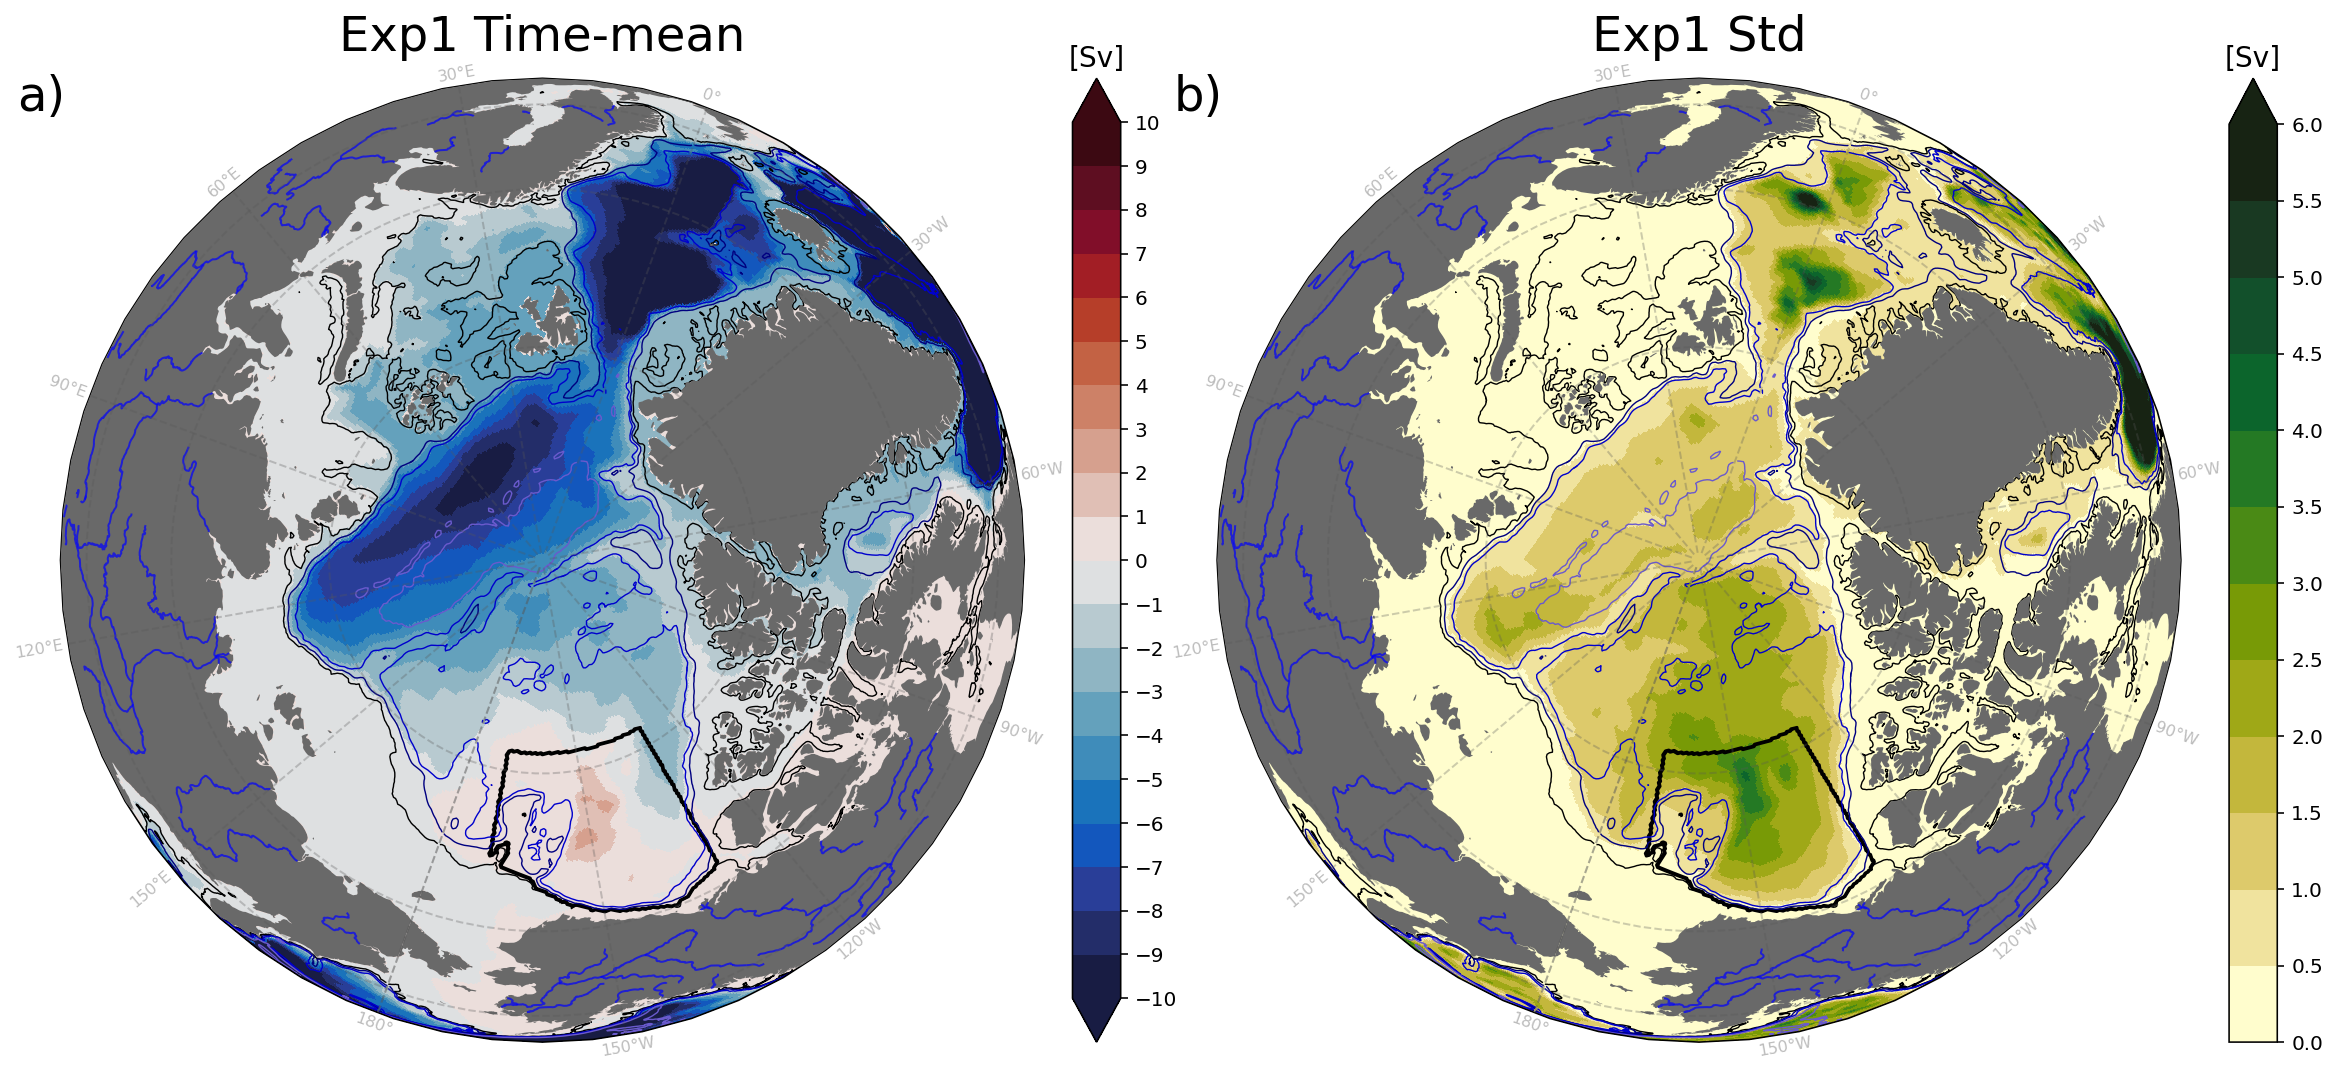

In [11]:
trdata  = ccrs.PlateCarree() 
proj = ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath)

rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')

label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']

fig, (axa,axb) = plt.subplots(1, 2,figsize=(19,12.5), facecolor='none', dpi=72*2, subplot_kw={'projection': proj})
# plt.subplots_adjust(wspace=0, hspace=0.1)
# gridspec_kw = {'wspace':0, 'hspace':0.1}

axa.text(-0.02, 0.98, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.02, 0.98, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)

# axa.text(-0.14, 0.5, 'Mean',          fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axa.transAxes)
# axd.text(-0.14, 0.5, 'STD',           fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axd.transAxes)

#----------------- MEAN part--------------------------------------
# ========GAI
data2plot = (psiGAImean).where(tmask!=0,0).squeeze()

# for mean maps
cmap = ccm.cm.balance
my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
lmin = -10
incr = 1
lmax = lmax = lmin*(-1)+incr
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

axa.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axa.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axa.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axa.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axa.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axa.set_title("Exp1 Time-mean", fontsize=24) 

cbar = fig.colorbar(cs,extend='both', ticks=bounds, ax=axa, cax = axa.inset_axes([1.05, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title(r'[Sv]', fontsize=14)

#----------------- STD part--------------------------------------

# ========GAI
data2plot = (psiGAIstd).where(tmask!=0,0).squeeze()

# for std maps
stdcmap = ccm.cm.speed
my_map1 = truncate_colormap(stdcmap)
stdcolors = my_map1(np.linspace(0., 1, 50))
stdmycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', stdcolors)

lmin = 0
incr = 0.5
lmax = 6.5
# define the bins and normalize
stdbounds  = np.arange(lmin,lmax,incr)
stdnorm = mcolors.BoundaryNorm(stdbounds, stdmycm.N)


axb.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axb.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = stdmycm,transform=trdata,norm=stdnorm)

clr2 = axb.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axb.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axb.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axb.set_title("Exp1 Std", fontsize=24) 

cbar = fig.colorbar(cs,extend='max', ticks=stdbounds, ax=axb, cax = axb.inset_axes([1.05, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title(r'[Sv]', fontsize=14)

namo="maps_psi_SI_4paperGAImean_std.png"
# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 
# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
# plt.close(fig)


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


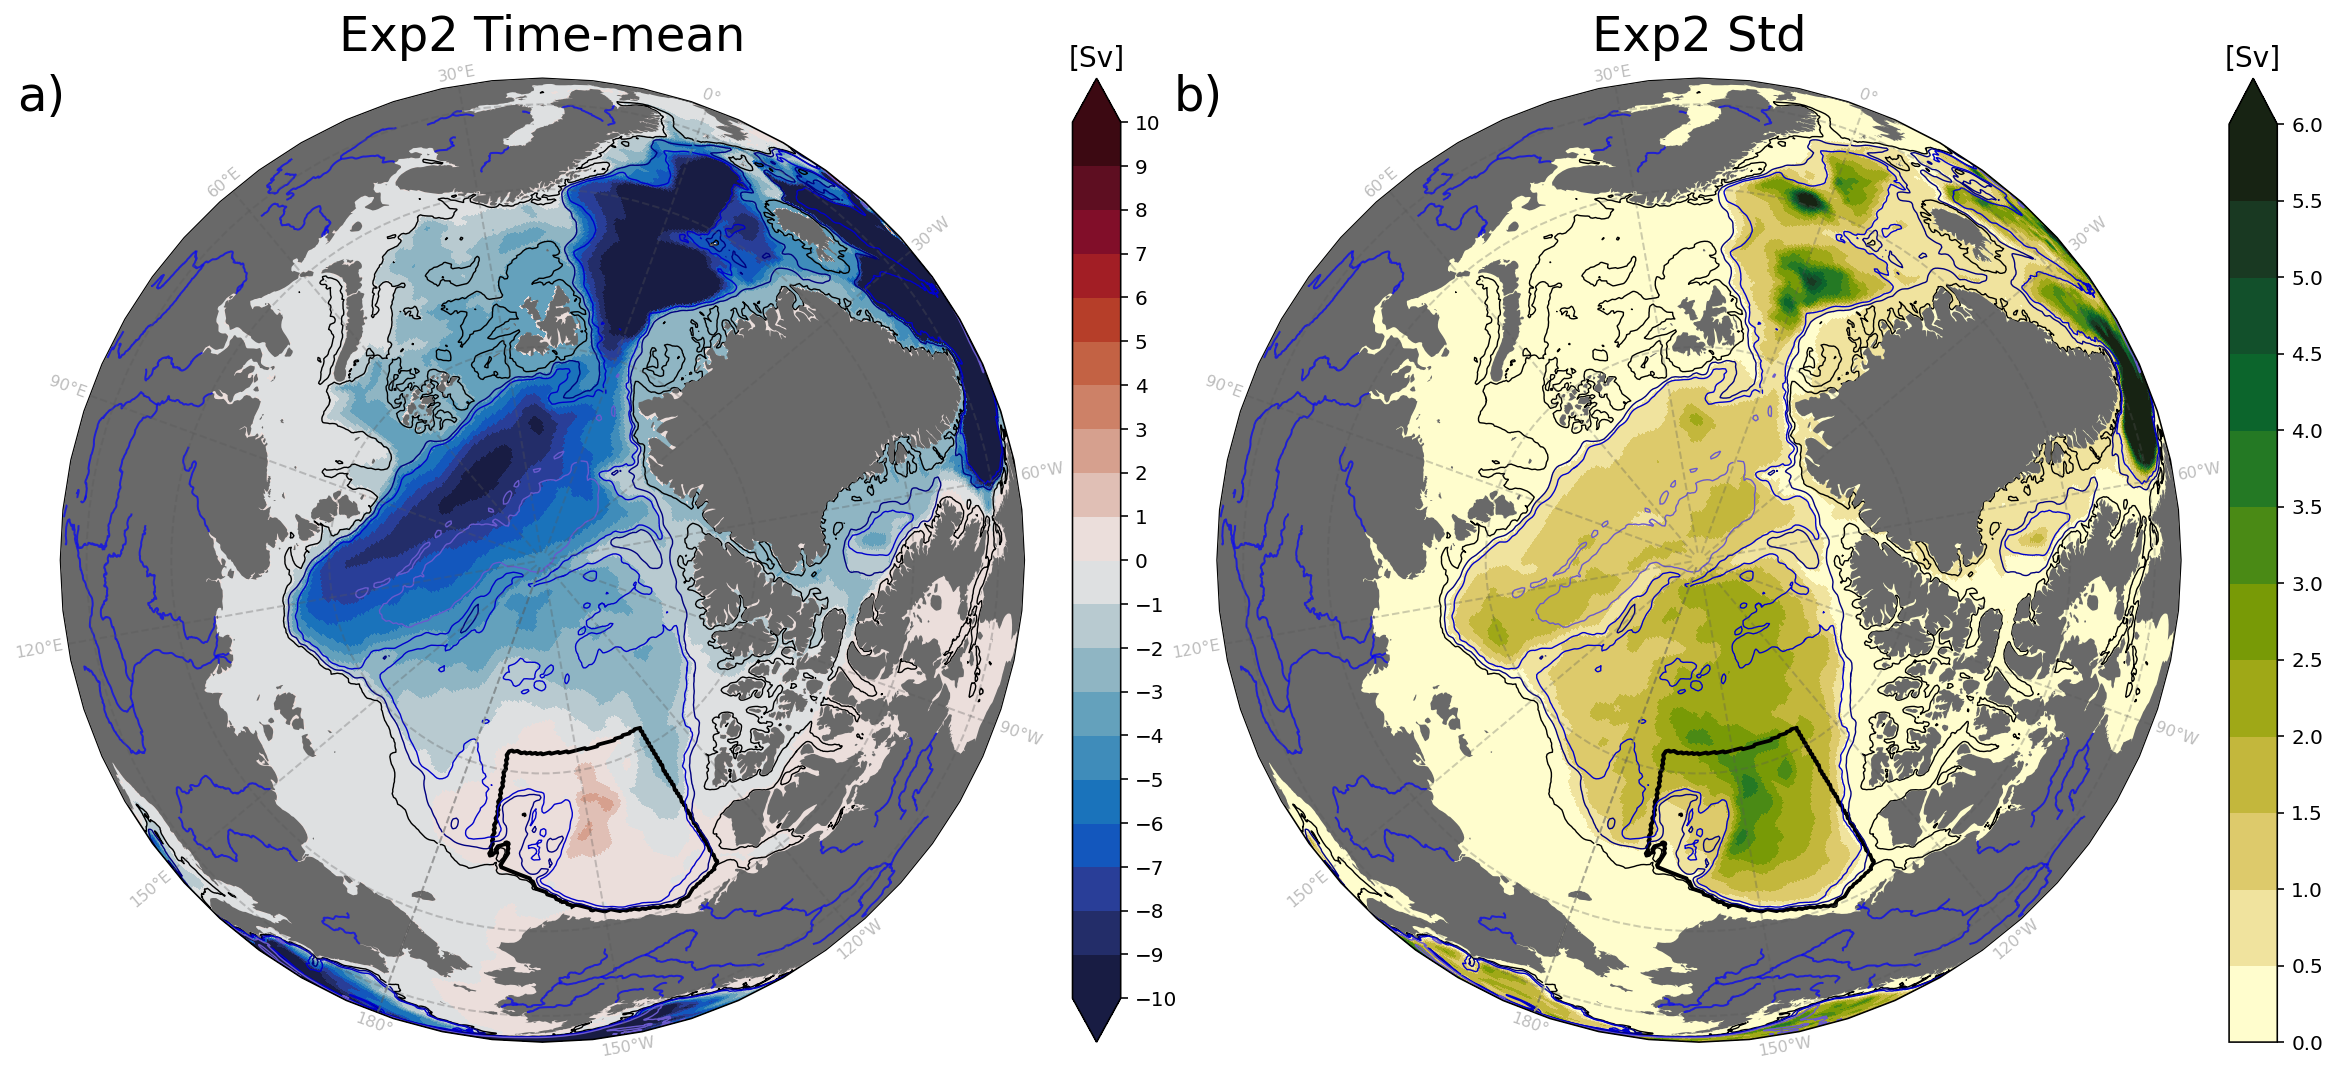

In [9]:
trdata  = ccrs.PlateCarree() 
proj = ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath)

rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')

label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']

fig, (axa,axb) = plt.subplots(1, 2,figsize=(19,12.5), facecolor='none', dpi=72*2, subplot_kw={'projection': proj})
# plt.subplots_adjust(wspace=0, hspace=0.1)
# gridspec_kw = {'wspace':0, 'hspace':0.1}

axa.text(-0.02, 0.98, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.02, 0.98, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)

# axa.text(-0.14, 0.5, 'Mean',          fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axa.transAxes)
# axd.text(-0.14, 0.5, 'STD',           fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axd.transAxes)

#----------------- MEAN part--------------------------------------
# ========AI
data2plot = (psiAImean).where(tmask!=0,0).squeeze()

# for mean maps
cmap = ccm.cm.balance
my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
lmin = -10
incr = 1
lmax = lmax = lmin*(-1)+incr
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

axa.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axa.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axa.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axa.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axa.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axa.set_title("Exp2 Time-mean", fontsize=24) 

cbar = fig.colorbar(cs,extend='both', ticks=bounds, ax=axa, cax = axa.inset_axes([1.05, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title(r'[Sv]', fontsize=14)

#----------------- STD part--------------------------------------

# ========AI
data2plot = (psiAIstd).where(tmask!=0,0).squeeze()

# for std maps
stdcmap = ccm.cm.speed
my_map1 = truncate_colormap(stdcmap)
stdcolors = my_map1(np.linspace(0., 1, 50))
stdmycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', stdcolors)

lmin = 0
incr = 0.5
lmax = 6.5
# define the bins and normalize
stdbounds  = np.arange(lmin,lmax,incr)
stdnorm = mcolors.BoundaryNorm(stdbounds, stdmycm.N)

axb.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axb.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = stdmycm,transform=trdata,norm=stdnorm)

clr2 = axb.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axb.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axb.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axb.set_title("Exp2 Std", fontsize=24) 

cbar = fig.colorbar(cs,extend='max', ticks=stdbounds, ax=axb, cax = axb.inset_axes([1.05, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title(r'[Sv]', fontsize=14)

namo="maps_psi_SI_4paperAImean_std.png"
# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 
# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
# plt.close(fig)


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


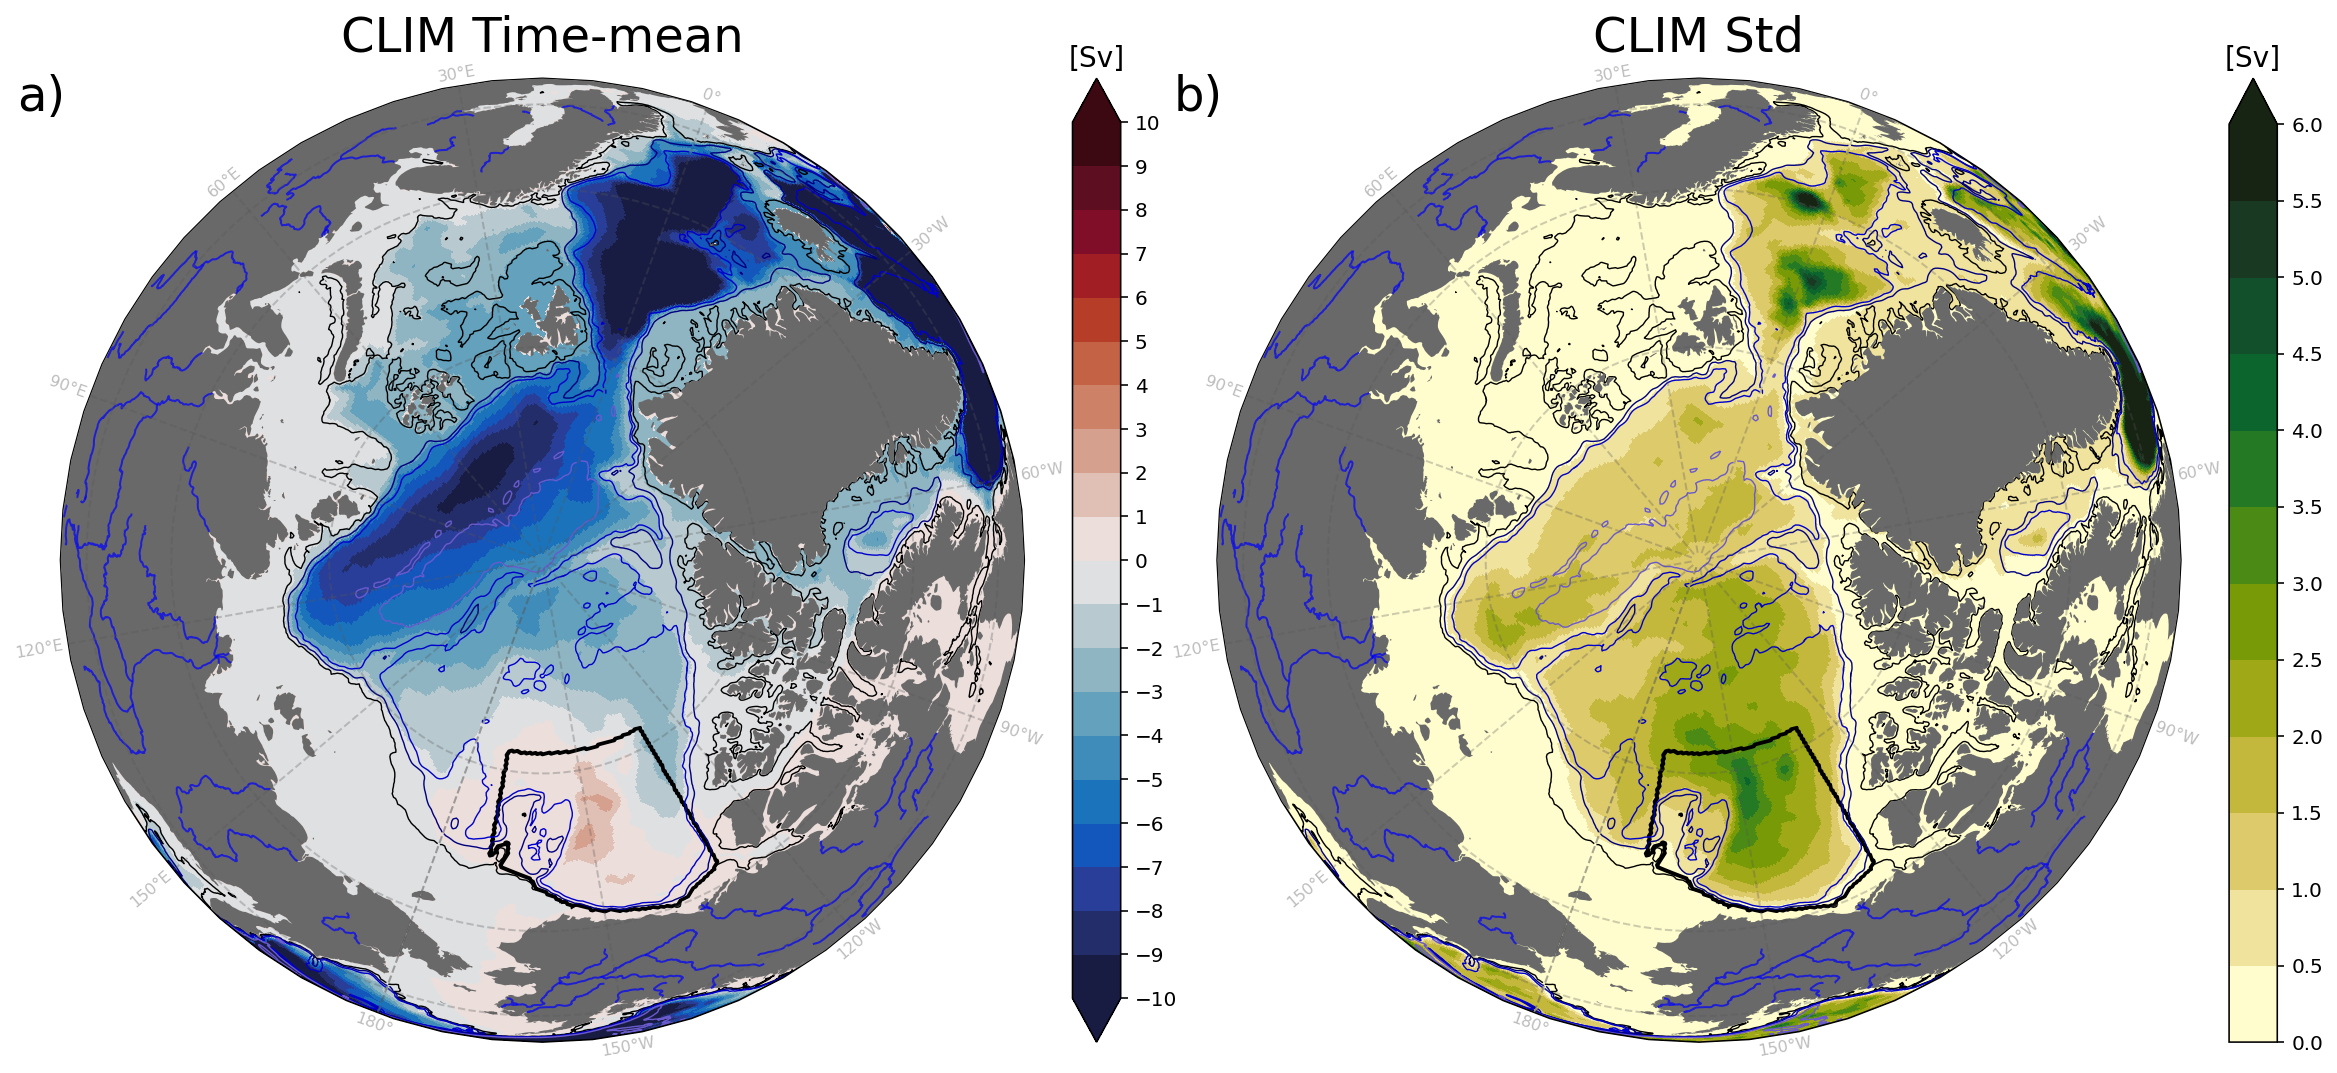

In [10]:
trdata  = ccrs.PlateCarree() 
proj = ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath)

rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')

label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']

fig, (axa,axb) = plt.subplots(1, 2,figsize=(19,12.5), facecolor='none', dpi=72*2, subplot_kw={'projection': proj})
# plt.subplots_adjust(wspace=0, hspace=0.1)
# gridspec_kw = {'wspace':0, 'hspace':0.1}

axa.text(-0.02, 0.98, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.02, 0.98, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)

# axa.text(-0.14, 0.5, 'Mean',          fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axa.transAxes)
# axd.text(-0.14, 0.5, 'STD',           fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axd.transAxes)

#----------------- MEAN part--------------------------------------
# ========S
data2plot = (psiSmean).where(tmask!=0,0).squeeze()

# for mean maps
cmap = ccm.cm.balance
my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
lmin = -10
incr = 1
lmax = lmax = lmin*(-1)+incr
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

axa.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axa.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axa.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axa.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axa.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axa.set_title("CLIM Time-mean", fontsize=24) 

cbar = fig.colorbar(cs,extend='both', ticks=bounds, ax=axa, cax = axa.inset_axes([1.05, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title(r'[Sv]', fontsize=14)

#----------------- STD part--------------------------------------

# ========S
data2plot = (psiSstd).where(tmask!=0,0).squeeze()

# for std maps
stdcmap = ccm.cm.speed
my_map1 = truncate_colormap(stdcmap)
stdcolors = my_map1(np.linspace(0., 1, 50))
stdmycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', stdcolors)

lmin = 0
incr = 0.5
lmax = 6.5
# define the bins and normalize
stdbounds  = np.arange(lmin,lmax,incr)
stdnorm = mcolors.BoundaryNorm(stdbounds, stdmycm.N)

axb.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axb.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = stdmycm,transform=trdata,norm=stdnorm)

clr2 = axb.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axb.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axb.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axb.set_title("CLIM Std", fontsize=24) 

cbar = fig.colorbar(cs,extend='max', ticks=stdbounds, ax=axb, cax = axb.inset_axes([1.05, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title(r'[Sv]', fontsize=14)

namo="maps_psi_SI_4paperSmean_std.png"
# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 
# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
# plt.close(fig)


## for the sensibilities

In [13]:
# for mean maps
cmap = ccm.cm.balance
my_map1 = truncate_colormap(cmap)
colors = my_map1(np.linspace(0., 1, 50))
mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
lmin = -10
incr = 1
lmax = lmax = lmin*(-1)+incr
# define the bins and normalize
bounds = np.arange(lmin,lmax,incr)
norm = mcolors.BoundaryNorm(bounds, mycm.N)

In [57]:
# # for mean maps
# cmap = ccm.cm.balance
# my_map1 = truncate_colormap(cmap)
# colors = my_map1(np.linspace(0., 1, 50))
# mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# lmin = -0.5
# incr = 0.1
# lmax = lmin*(-1)+incr
# # define the bins and normalize
# bounds = np.arange(lmin,lmax,incr)
# norm = mcolors.BoundaryNorm(bounds, mycm.N)

In [62]:
# # for mean maps
# cmap = ccm.cm.balance
# my_map1 = truncate_colormap(cmap)
# colors = my_map1(np.linspace(0., 1, 50))
# mycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# lmin = -0.1
# incr = 0.01
# lmax = lmin*(-1)+incr
# # define the bins and normalize
# bounds = np.arange(lmin,lmax,incr)
# norm = mcolors.BoundaryNorm(bounds, mycm.N)

In [58]:
# # for std maps
# stdcmap = ccm.cm.delta
# my_map1 = truncate_colormap(stdcmap)
# stdcolors = my_map1(np.linspace(0., 1, 50))
# stdmycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', stdcolors)

# lmin = -0.5
# incr = 0.1
# lmax = lmin*(-1)+incr
# # define the bins and normalize
# stdbounds  = np.arange(lmin,lmax,incr)
# stdnorm = mcolors.BoundaryNorm(stdbounds, stdmycm.N)

In [14]:
# for std maps
stdcmap = ccm.cm.speed
my_map1 = truncate_colormap(stdcmap)
stdcolors = my_map1(np.linspace(0., 1, 50))
stdmycm = mcolors.LinearSegmentedColormap.from_list('my_colormap', stdcolors)

lmin = 0
incr = 0.5
lmax = 6.5
# define the bins and normalize
stdbounds  = np.arange(lmin,lmax,incr)
stdnorm = mcolors.BoundaryNorm(stdbounds, stdmycm.N)

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/gpfslocalsup/pub/anac

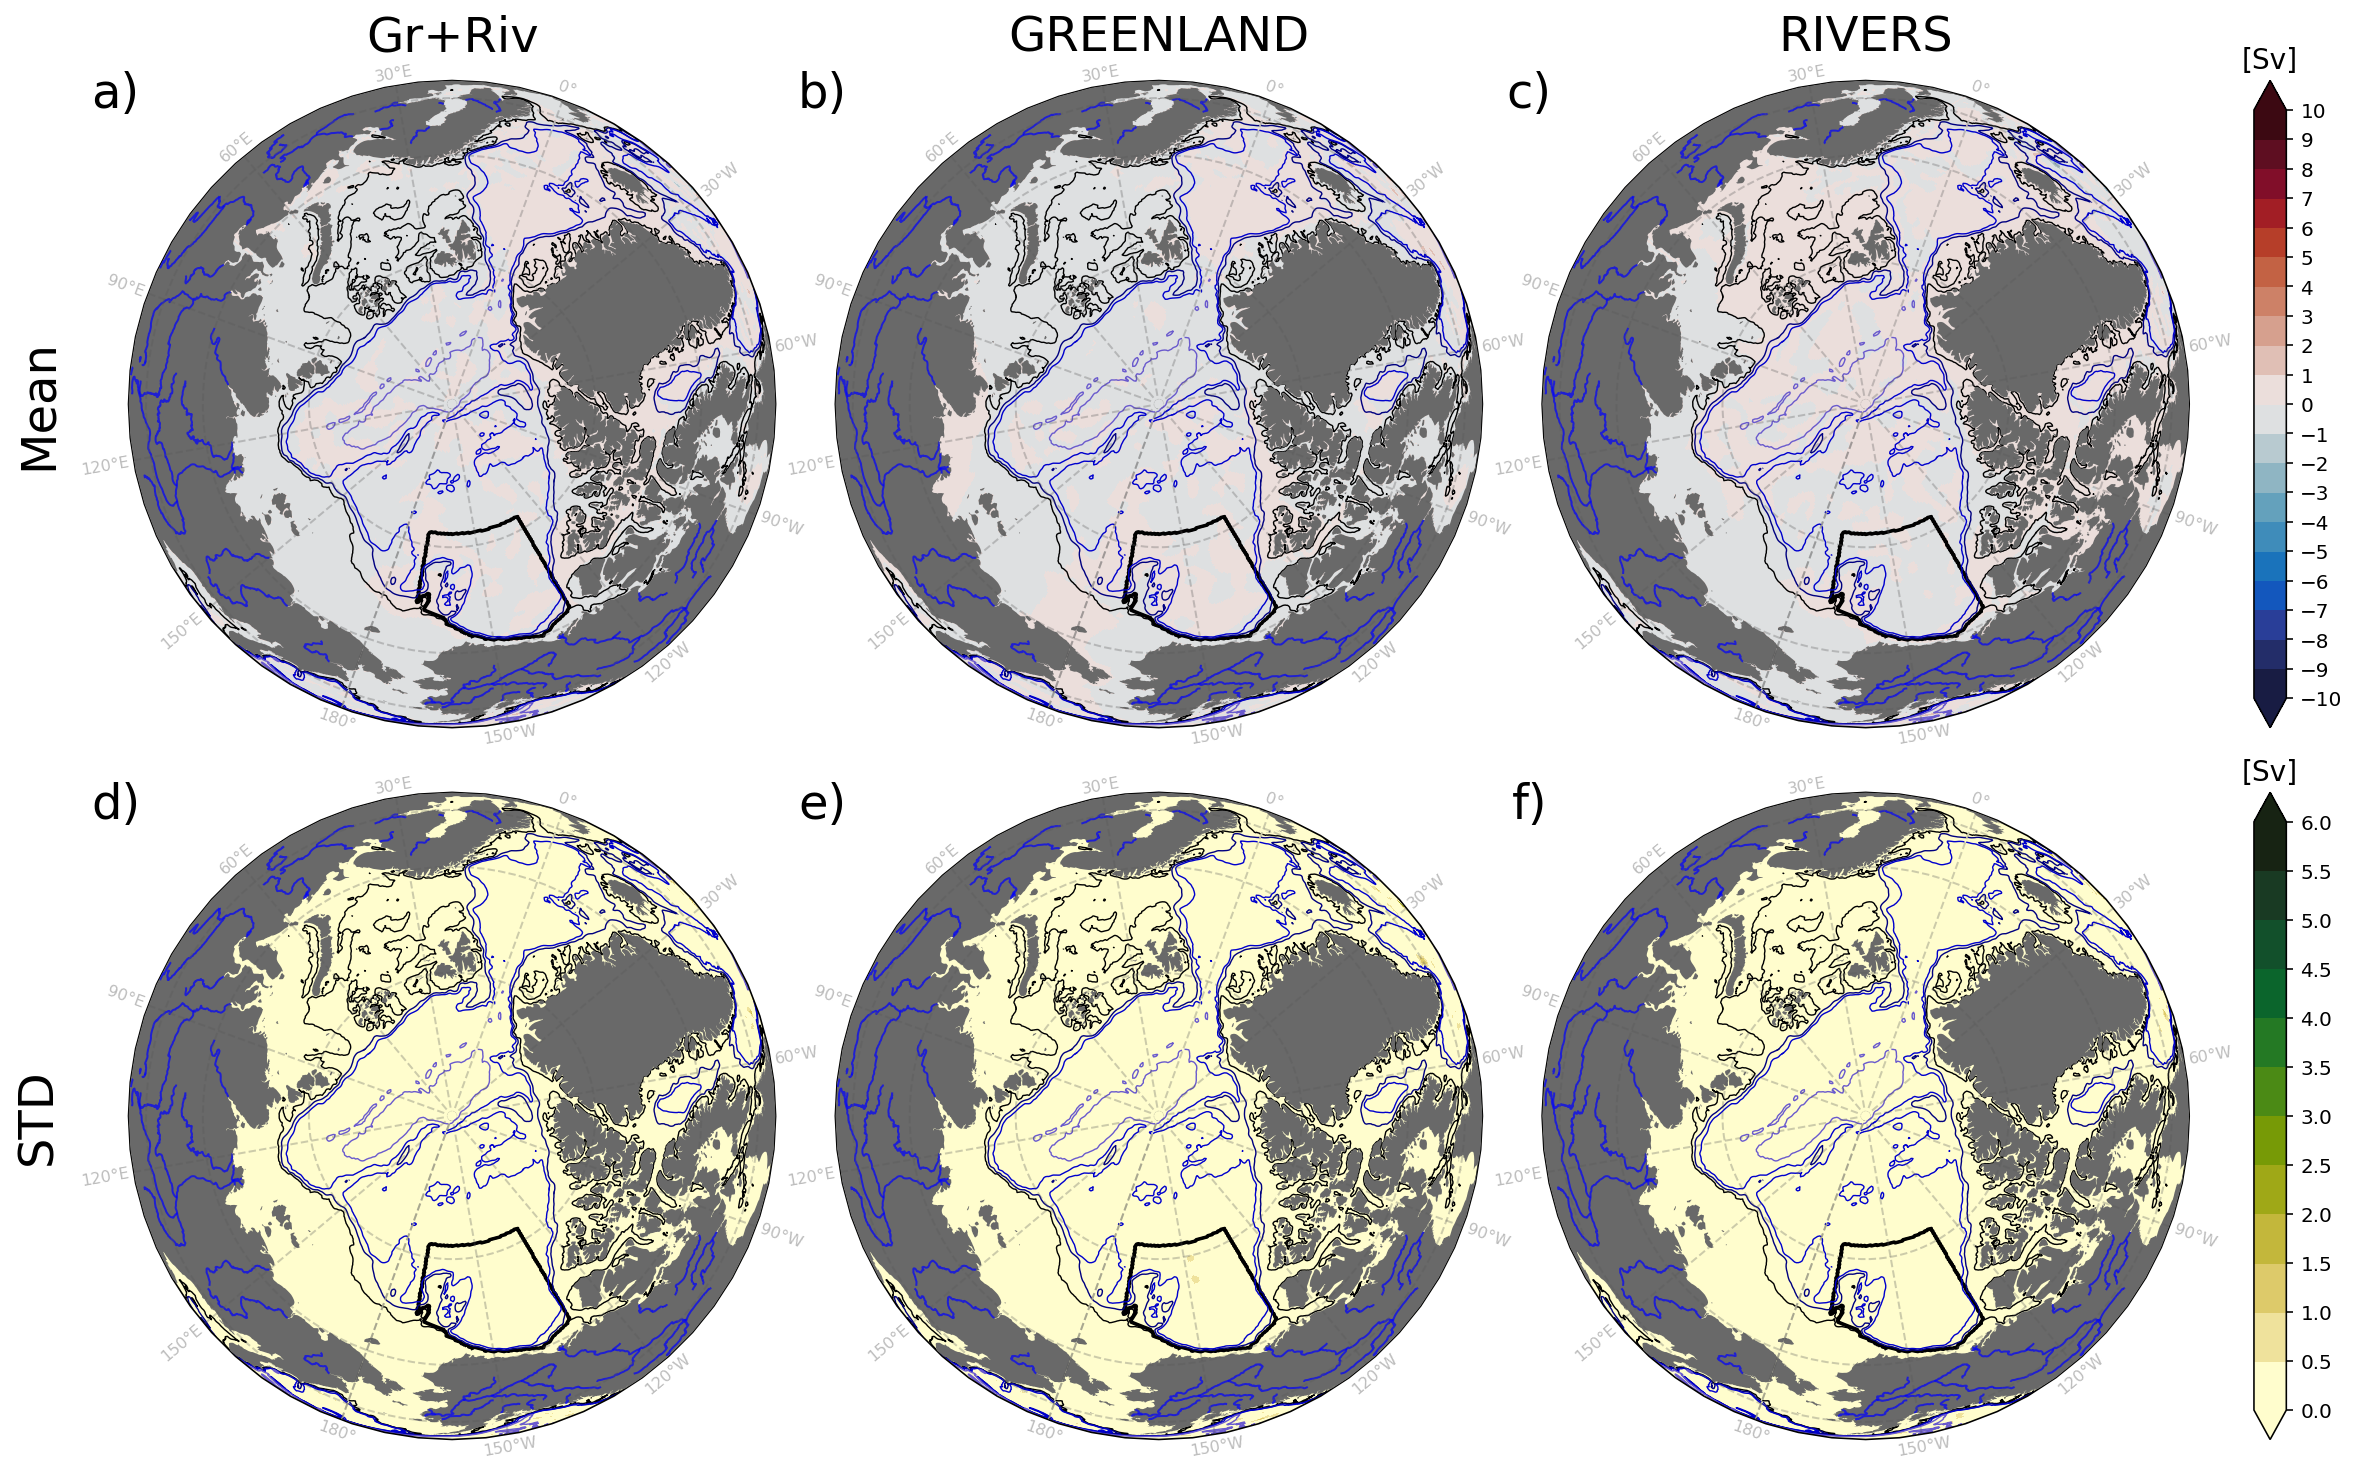

In [16]:
trdata  = ccrs.PlateCarree() 
proj = ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath)

rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor='b')

label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']

fig, [(axa,axb,axc),(axd,axe,axf)] = plt.subplots(2, 3,figsize=(19,12.5),facecolor='none', \
                                                                           dpi=72*2,subplot_kw={'projection': proj})
plt.subplots_adjust(wspace=0, hspace=0.1)
# gridspec_kw = {'wspace':0, 'hspace':0.1}

axa.text(-0.02, 0.98, 'a)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axa.transAxes)
axb.text(-0.02, 0.98, 'b)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axb.transAxes)
axc.text(-0.02, 0.98, 'c)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axc.transAxes)
axd.text(-0.02, 0.98, 'd)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axd.transAxes)
axe.text(-0.02, 0.98, 'e)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axe.transAxes)
axf.text(-0.02, 0.98, 'f)', fontsize=24, horizontalalignment='center', verticalalignment='center', transform=axf.transAxes)

axa.text(-0.14, 0.5, 'Mean',          fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axa.transAxes)
axd.text(-0.14, 0.5, 'STD',           fontsize=24, horizontalalignment='center', verticalalignment='center',rotation='vertical', transform=axd.transAxes)

#----------------- MEAN part--------------------------------------
# ========GAI-S
data2plot = (psiGAI_Smean).where(tmask!=0,0).squeeze()
axa.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axa.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axa.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axa.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axa.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axa.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axa.set_title("Gr+Riv", fontsize=24) 

# ========GAI-AI
data2plot = (psiGAI_AImean).where(tmask!=0,0).squeeze()
axb.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axb.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axb.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axb.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axb.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axb.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
axb.set_title("GREENLAND", fontsize=24) 

# ========AI-S
data2plot = (psiAI_Smean).where(tmask!=0,0).squeeze()
axc.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axc.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = mycm,transform=trdata,norm=norm)

clr2 = axc.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axc.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axc.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axc.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axc.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

axc.set_title("RIVERS", fontsize=24) 

cbar = fig.colorbar(cs,extend='both', ticks=bounds, ax=axc, cax = axc.inset_axes([1.1, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(r'[Sv]', fontsize=14)
cbar.ax.set_title(r'[Sv]', fontsize=14)


#----------------- STD part--------------------------------------
# ========GAI-S
data2plot = (psiGAI_Sstd).where(tmask!=0,0).squeeze()
axd.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axd.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = stdcmap,transform=trdata,norm=stdnorm)

clr2 = axd.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axd.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axd.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axd.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axd.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

# ========GAI-AI
data2plot = (psiGAI_AIstd).where(tmask!=0,0).squeeze()
axe.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axe.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = stdcmap,transform=trdata,norm=stdnorm)

clr2 = axe.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axe.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axe.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axe.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axe.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

# ========AI-S
data2plot = (psiAI_Sstd).where(tmask!=0,0).squeeze()
axf.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)
cs  = axf.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',cmap = stdcmap,transform=trdata, norm=stdnorm)

clr2 = axf.add_feature(rivers,alpha=0.7,facecolor='none',edgecolor='blue',zorder=6)
cl2  = axf.add_feature(cfeature.LAND.with_scale('50m'),facecolor="dimgrey",edgecolor= 'none',alpha=1,zorder=5)
gl   = axf.gridlines(xlocs=range(-180,181,incrgridlon), ylocs=range(-90,91,incrgridlat),draw_labels=True,linewidth=1, color='#585858', alpha=0.3, linestyle='--',zorder=8)
gl.xlabel_style = label_style; gl.ylabel_style = label_style

Ct1 = axf.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = axf.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)

cbar = fig.colorbar(cs,extend='both', ticks=stdbounds, ax=axf, cax = axf.inset_axes([1.1, 0, 0.05, 1.0]))
# fig.colorbar(pcm, ax=ax, cax=cax))
cbar.ax.tick_params(labelsize=10)
# cbar.set_label(r'[Sv]', fontsize=14)
cbar.ax.set_title(r'[Sv]', fontsize=14)


namo="maps_psi_SI_4paper_sensibilities.png"
# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 
plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
plt.close(fig)